# Introduction
Obesity is a significant and growing public health concern. America has a high prevalence of obesity compared to many other regions. Obesity is a major risk factor for numerous chronic diseases. A comprehensive understanding of the contributing factors to obesity is essential for the development of interventions aimed at reducing obesity prevalence. This will have the beneficial effect of mitigating economic costs and improving individual productivity.

This project uses a Kaggle dataset for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

## 1 Library Imports

In [6]:
# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import linear model
from sklearn.linear_model import Lasso, Ridge

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# import model performance metrics
from sklearn.metrics import r2_score, mean_absolute_error

## 2 Exploratory Analysis

In [8]:
# Load data
df = pd.read_csv('Obesity prediction.csv')
print(df.shape)
df.head()

(2111, 17)


Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

### Basic Information
* How many observations and features does your dataset have?
* Do you understand each feature intuitively?
* Do the values for each feature make sense? Are they on the right scale?
* Do you anticipate issues with missing data?
* Were your features read in as the correct datatype?ype?type?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [11]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

### Distributions
* Do each of the distributions make intuitive sense to you?
* Do you anticipate any issues with outliers or sparse data?
* Are there any surprising distributions you should take a closer look at?
* Do the summary statistics confirm what you’ve seen from the charts?

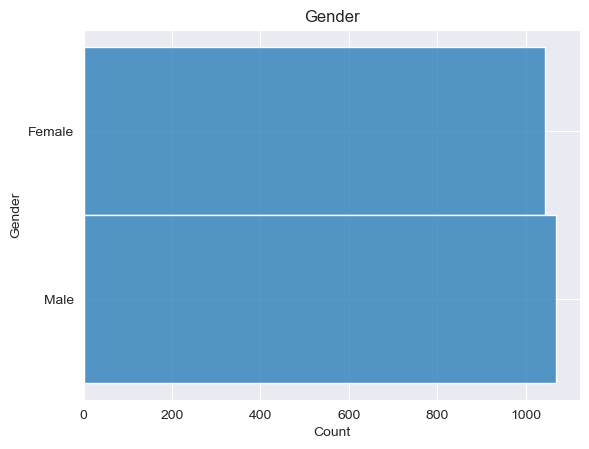

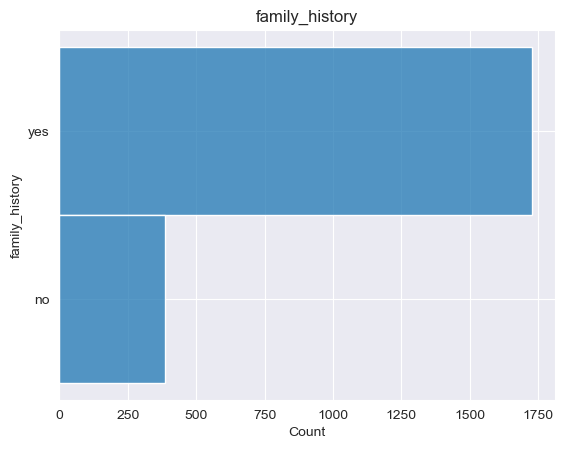

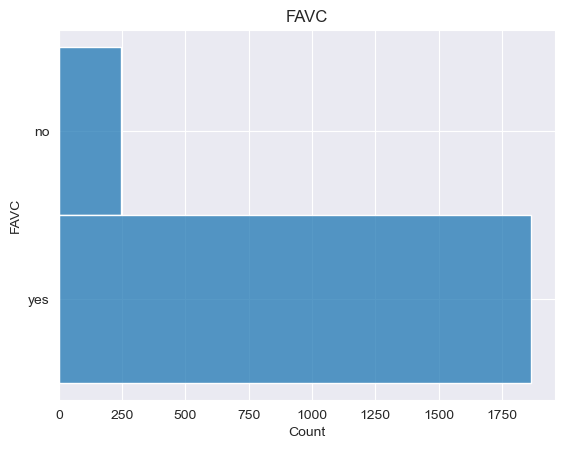

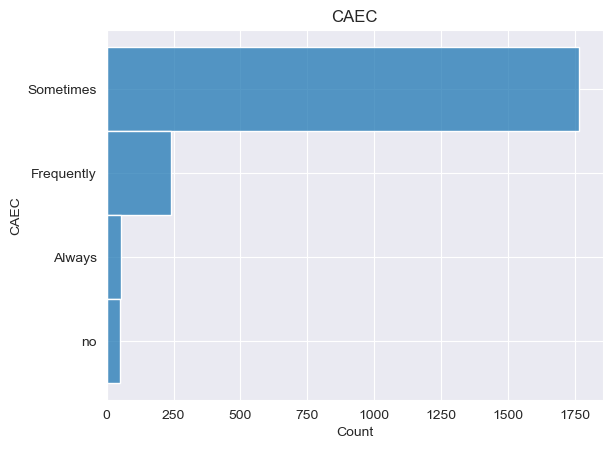

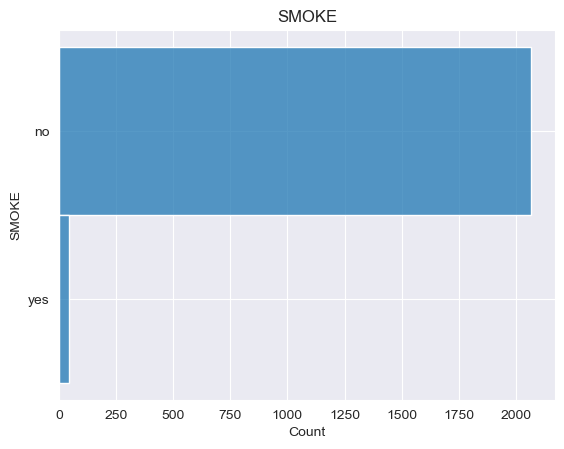

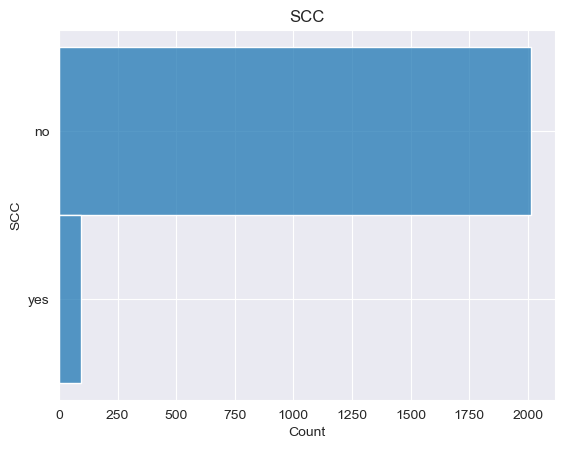

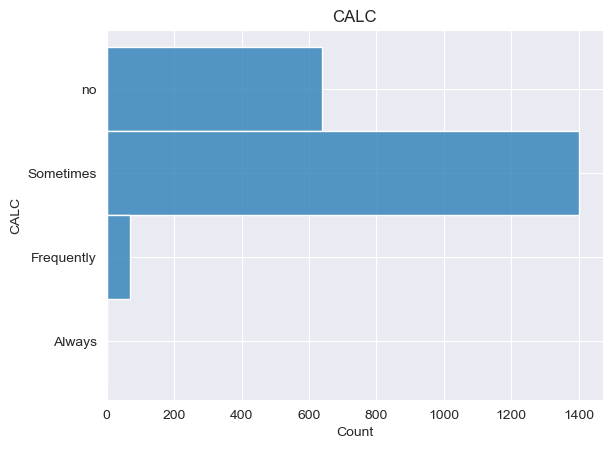

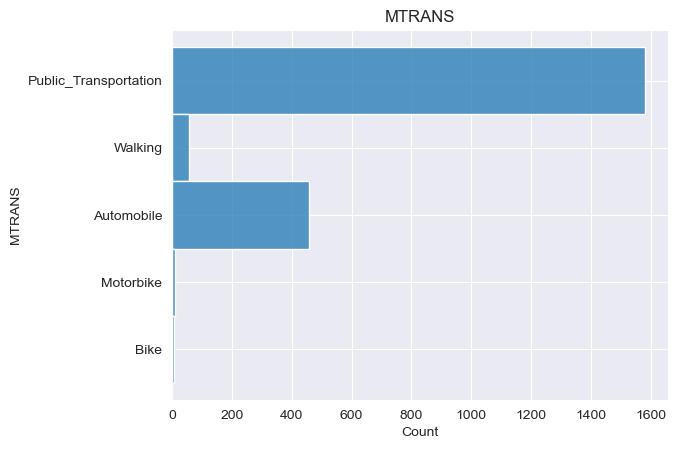

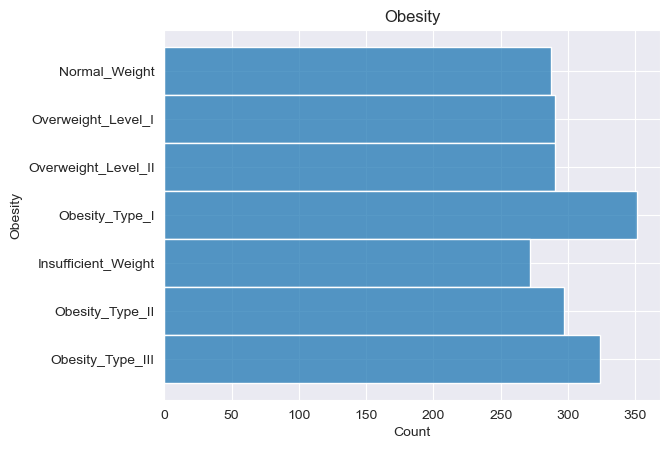

In [13]:
# categorical features distribution
for v in df.select_dtypes(include='object'):
    sns.histplot(y=df[v])
    plt.title(v)
    plt.show()

In [14]:
obesity=df['Obesity'].value_counts()
obesity

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [15]:
# Reorder the monthly ride list so months go in order
obesity_order = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I',
                 'Obesity_Type_II', 'Obesity_Type_III']

obesity = obesity.reindex(index=obesity_order)

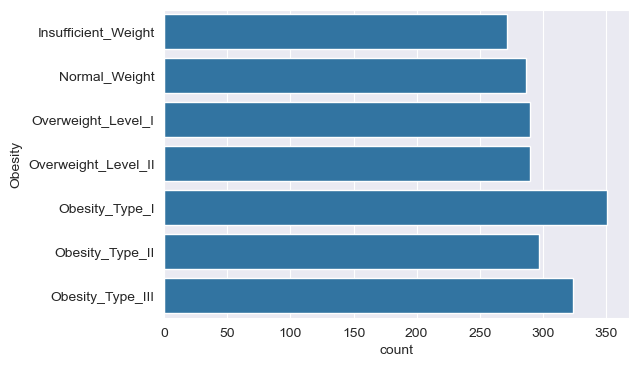

In [16]:
# Create a bar plot 
plt.figure(figsize=(6,4))
ax = sns.barplot(y=obesity.index, x=obesity)

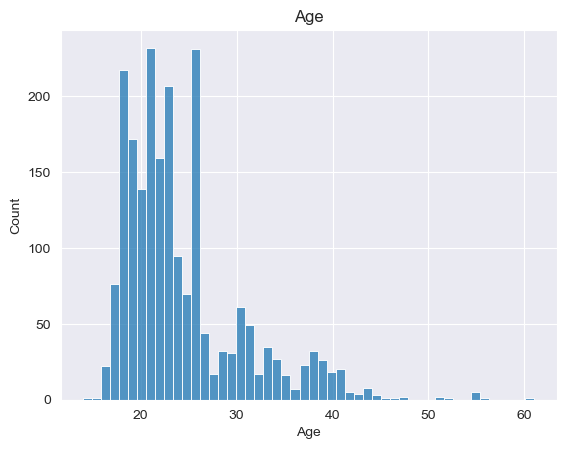

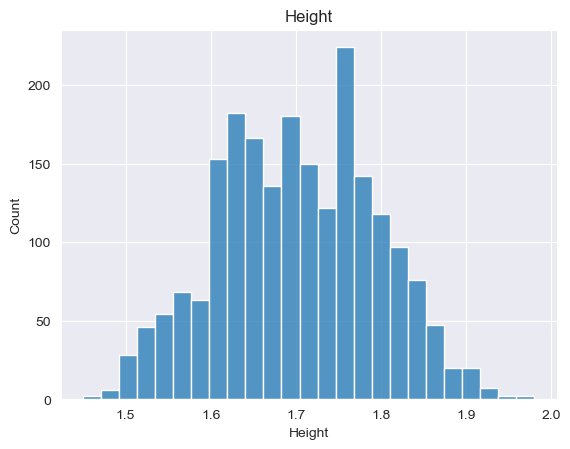

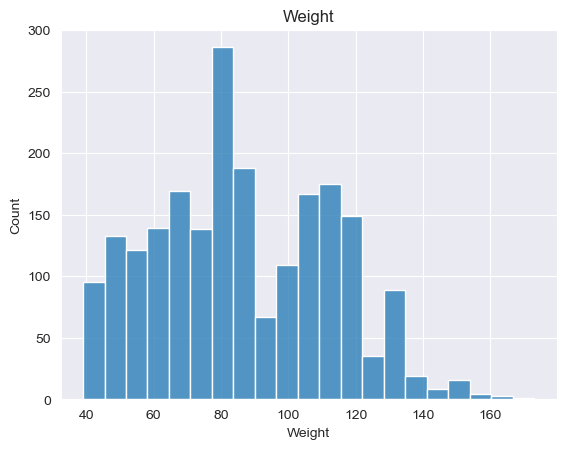

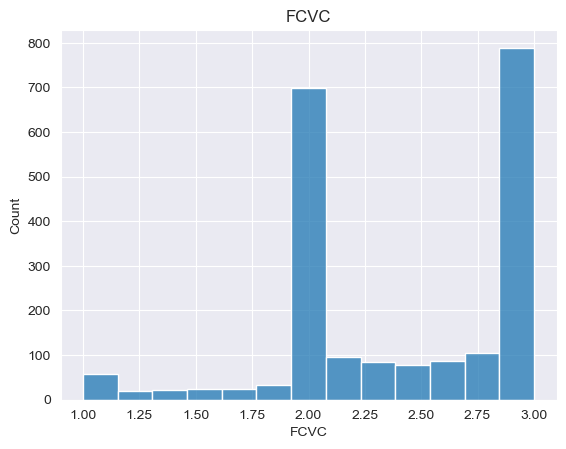

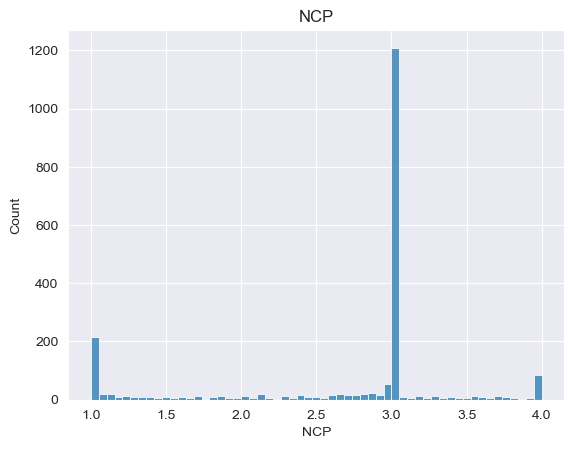

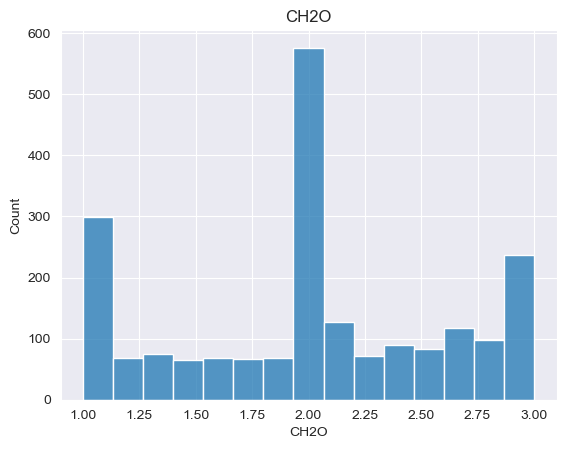

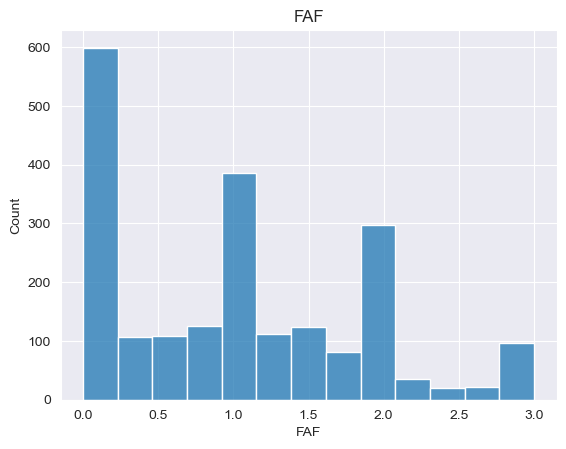

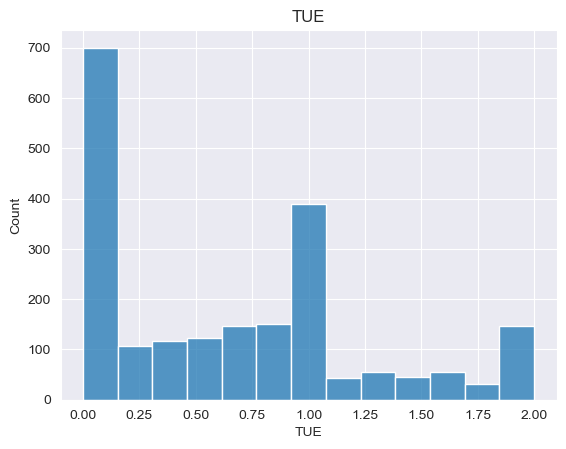

In [17]:
# numeric features distribution
for v in df.select_dtypes(exclude='object'):
    sns.histplot(df[v])
    plt.title(v)
    plt.show()

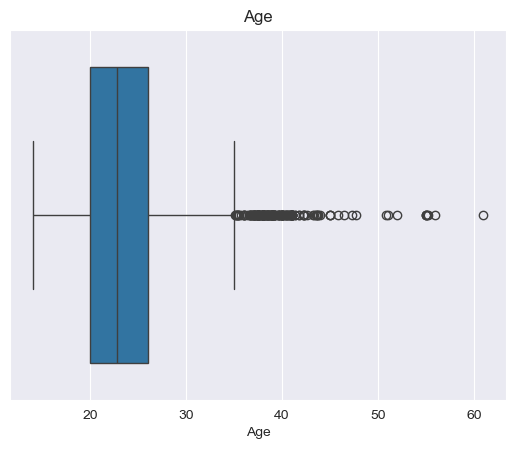

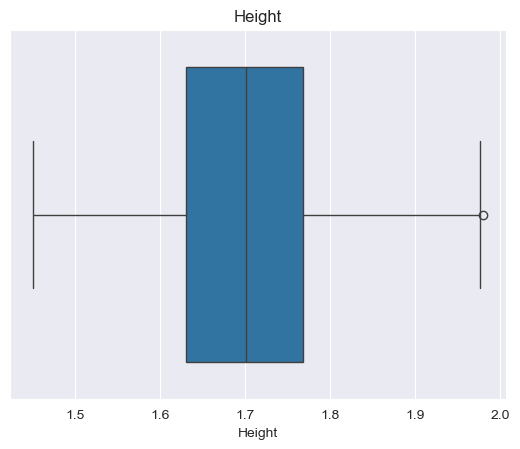

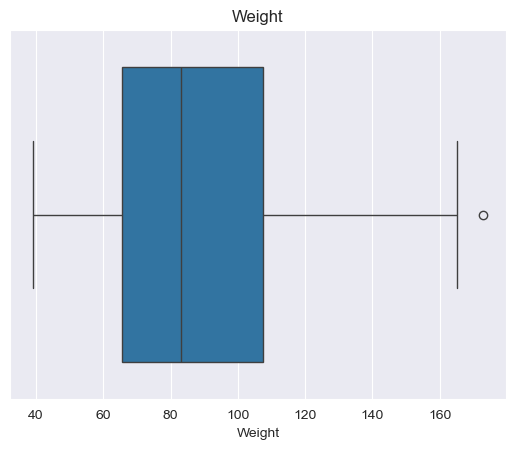

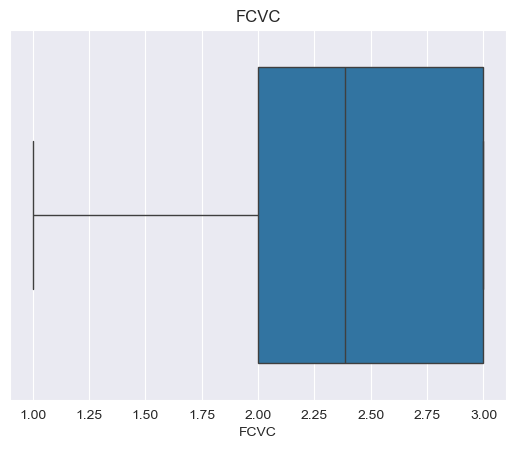

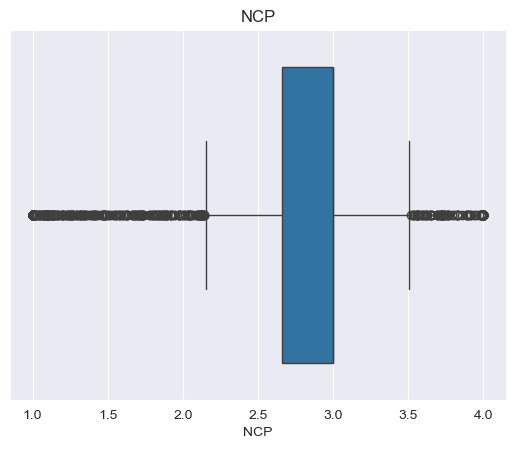

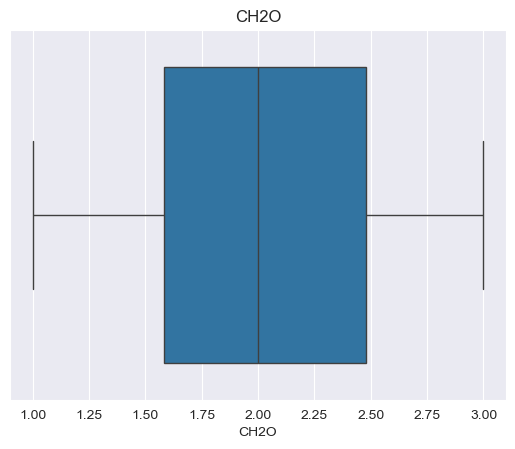

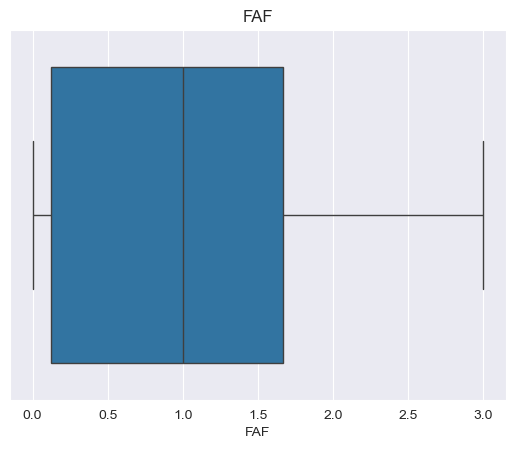

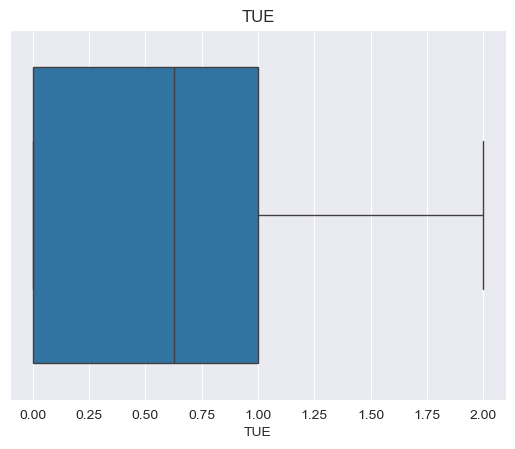

In [18]:
# boxplot
for v in df.select_dtypes(exclude='object'):
    sns.boxplot(x=df[v])
    plt.title(v)
    plt.show()

### Feature Relationships (Segmentations & Correlations)
* Have you segmented key categorical features and/or the target variable?
* What have you learned about the relationships between your features?
* Are there any surprising correlations (or non-correlations)?
* Have you visualized your correlation matrix for easier reference?
* Do you anticipate any helpful new features to engineer?

* FCVC : Do you usually eat vegetables in your meals?
* NCP : How many main meals do you have daily?
* CH2O : How much water do you drink daily?
* FAF: How often do you have physical activity?
* TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

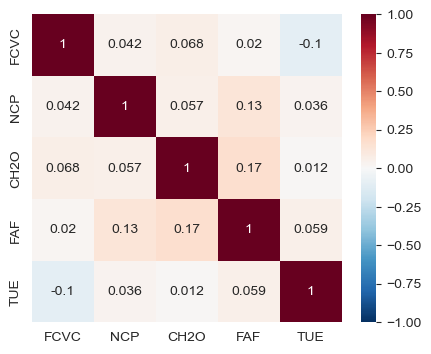

In [21]:
vars=['FCVC','NCP','CH2O','FAF','TUE']
corr = df[vars].corr()

sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

it's a bit supprised that these two features are not quite correlated
* CH2O : How much water do you drink daily?* 
FAF: How often do you have physical activity?

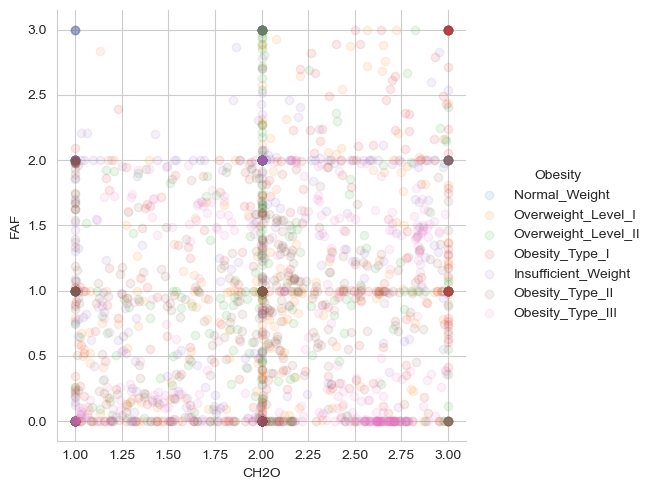

In [23]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='CH2O',
           y='FAF',
           hue='Obesity',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

## 3 Data Cleaning

### Unwanted Observations
* Have you dropped duplicate observations?
* Have you dropped irrelevant observations?
### Structural Errors
* Are there any features that should be encoded as binary indicator variables?
* Have you fixed typos and inconsistent capitalization in your categorical features?
* Are there any classes in your categorical features that refer to the same thing?
### Outliers
* Have you visually checked for any potential outliers to remove in your features?
* Do you have a good reason to remove each outlier? ( e.g. suspicious measurements, different population, different application )
### Missing Data
* Have you labeled missing values in categorical features?
* Have you flagged and filled missing values in numeric features?

In [26]:
# check for duplicates
df.duplicated().sum()

24

In [27]:
df=df.drop_duplicates()
df.shape

(2087, 17)

In [28]:
# check for structural error
for v in df.select_dtypes(include='object'):
    print(v)
    print (df[v].unique())

Gender
['Female' 'Male']
family_history
['yes' 'no']
FAVC
['no' 'yes']
CAEC
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE
['no' 'yes']
SCC
['no' 'yes']
CALC
['no' 'Sometimes' 'Frequently' 'Always']
MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [29]:
# check for missing value
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 4 Feature Engineering

Feature engineering is one of the best ways data scientists can improve model performance and add value into the applied machine learning process.
### Domain Knowledge
* Do you have prior expertise in your chosen domain? If not, have you done sufficient reading / research / preparation to understand it better?
* Do you know anyone else in your network who also has domain expertise?
* Based on your knowledge of the domain, are there any features you could engineer that would potentially improve the performance of your model?
### Heuristics
* Are there any interaction features you could create?
* Are there any indicator features you could create?
* Have you grouped sparse classes in your categorical features?
* Do you need to do any form of data wrangling, such as aggregating data (i.e.rolling it up)?
* Are there any ordinal categorical features you could encode as numeric?
* Are there any potentially useful outside datasets you could merge in?
### Preparing the Analysis Base Table
* Have you created dummy variables for your categorical features?
* Have you dropped unused and/or redundant features? ( e.g. ID columns, features that wouldn’t be available, text descriptions and metadata, etc. )

In [32]:
# create new feature -BMI based on Weight and Height
df['bmi']=df['Weight']/df['Height']**2
df.head()

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity        bmi  
0        Normal_Weight  24.386526  
1        Normal_Weight  24.238227  
2        Normal_Weight  23.765432  
3   Overweight_Level_I  26.851852  
4  Overweight_Level_II  28.342381

In [33]:
# encode ordinal categorical features as numeric (CAEC, CALC)
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['no','Sometimes', 'Frequently', 'Always']])
df['CAEC_encoded'] = oe.fit_transform(df[['CAEC']])
pd.crosstab(df['CAEC_encoded'],df['CAEC'])

CAEC          Always  Frequently  Sometimes  no
CAEC_encoded                                   
0.0                0           0          0  37
1.0                0           0       1761   0
2.0                0         236          0   0
3.0               53           0          0   0

In [34]:
df['CALC_encoded'] = oe.fit_transform(df[['CALC']])
pd.crosstab(df['CALC_encoded'],df['CALC'])

CALC          Always  Frequently  Sometimes   no
CALC_encoded                                    
0.0                0           0          0  636
1.0                0           0       1380    0
2.0                0          70          0    0
3.0                1           0          0    0

In [35]:
# recode binary variable
for V in ['family_history', 'FAVC','SMOKE','SCC']:
    df[V]=(df[V]=='yes').astype(int)
df['Gender']=(df['Gender']=='Male').astype(int)
df.head()

Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP       CAEC  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0  Sometimes   
1       0  21.0    1.52    56.0               1     0   3.0  3.0  Sometimes   
2       1  23.0    1.80    77.0               1     0   2.0  3.0  Sometimes   
3       1  27.0    1.80    87.0               0     0   3.0  3.0  Sometimes   
4       1  22.0    1.78    89.8               0     0   2.0  1.0  Sometimes   

   SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0      0   2.0    0  0.0  1.0          no  Public_Transportation   
1      1   3.0    1  3.0  0.0   Sometimes  Public_Transportation   
2      0   2.0    0  2.0  1.0  Frequently  Public_Transportation   
3      0   2.0    0  2.0  0.0  Frequently                Walking   
4      0   2.0    0  0.0  0.0   Sometimes  Public_Transportation   

               Obesity        bmi  CAEC_encoded  CALC_encoded  
0        Normal_Weight  24.386526           1.0           0.0  
1        Normal_Weight  24.238227           1.0           1.0  
2        Normal_Weight  23.765432           1.0           2.0  
3   Overweight_Level_I  26.851852           1.0           2.0  
4  Overweight_Level_II  28.342381           1.0           1.0

In [36]:
# create dummy variables for nominal data
df=pd.get_dummies(df, columns=['MTRANS'],dtype=float)
df.head()

Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP       CAEC  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0  Sometimes   
1       0  21.0    1.52    56.0               1     0   3.0  3.0  Sometimes   
2       1  23.0    1.80    77.0               1     0   2.0  3.0  Sometimes   
3       1  27.0    1.80    87.0               0     0   3.0  3.0  Sometimes   
4       1  22.0    1.78    89.8               0     0   2.0  1.0  Sometimes   

   SMOKE  ...        CALC              Obesity        bmi  CAEC_encoded  \
0      0  ...          no        Normal_Weight  24.386526           1.0   
1      1  ...   Sometimes        Normal_Weight  24.238227           1.0   
2      0  ...  Frequently        Normal_Weight  23.765432           1.0   
3      0  ...  Frequently   Overweight_Level_I  26.851852           1.0   
4      0  ...   Sometimes  Overweight_Level_II  28.342381           1.0   

  CALC_encoded MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0          0.0               0.0          0.0               0.0   
1          1.0               0.0          0.0               0.0   
2          2.0               0.0          0.0               0.0   
3          2.0               0.0          0.0               0.0   
4          1.0               0.0          0.0               0.0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                           1.0             0.0  
1                           1.0             0.0  
2                           1.0             0.0  
3                           0.0             1.0  
4                           1.0             0.0  

[5 rows x 24 columns]

In [37]:
# Convert target variable into an ordinal variable
oe = OrdinalEncoder(categories=[['Insufficient_Weight','Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I',
                 'Obesity_Type_II', 'Obesity_Type_III']])
df['Obesity_encoded'] = oe.fit_transform(df[['Obesity']])

pd.crosstab(df['Obesity_encoded'],df['Obesity'])

Obesity          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Obesity_encoded                                                       
0.0                              267              0               0   
1.0                                0            282               0   
2.0                                0              0               0   
3.0                                0              0               0   
4.0                                0              0             351   
5.0                                0              0               0   
6.0                                0              0               0   

Obesity          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Obesity_encoded                                                          
0.0                            0                 0                   0   
1.0                            0                 0                   0   
2.0                            0                 0                 276   
3.0                            0                 0                   0   
4.0                            0                 0                   0   
5.0                          297                 0                   0   
6.0                            0               324                   0   

Obesity          Overweight_Level_II  
Obesity_encoded                       
0.0                                0  
1.0                                0  
2.0                                0  
3.0                              290  
4.0                                0  
5.0                                0  
6.0                                0

In [38]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Obesity',
       'bmi', 'CAEC_encoded', 'CALC_encoded', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Obesity_encoded'],
      dtype='object')

In [39]:
columns=['Height','Weight','CAEC','CALC','Obesity']
abt=df.drop(columns=columns)
abt.head()

Gender   Age  family_history  FAVC  FCVC  NCP  SMOKE  CH2O  SCC  FAF  TUE  \
0       0  21.0               1     0   2.0  3.0      0   2.0    0  0.0  1.0   
1       0  21.0               1     0   3.0  3.0      1   3.0    1  3.0  0.0   
2       1  23.0               1     0   2.0  3.0      0   2.0    0  2.0  1.0   
3       1  27.0               0     0   3.0  3.0      0   2.0    0  2.0  0.0   
4       1  22.0               0     0   2.0  1.0      0   2.0    0  0.0  0.0   

         bmi  CAEC_encoded  CALC_encoded  MTRANS_Automobile  MTRANS_Bike  \
0  24.386526           1.0           0.0                0.0          0.0   
1  24.238227           1.0           1.0                0.0          0.0   
2  23.765432           1.0           2.0                0.0          0.0   
3  26.851852           1.0           2.0                0.0          0.0   
4  28.342381           1.0           1.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
0               0.0                           1.0             0.0   
1               0.0                           1.0             0.0   
2               0.0                           1.0             0.0   
3               0.0                           0.0             1.0   
4               0.0                           1.0             0.0   

   Obesity_encoded  
0              1.0  
1              1.0  
2              1.0  
3              2.0  
4              3.0

In [40]:
abt.to_csv('analytical base table.csv',index=None)

## 5 Algorithm Selection

* Why choose those algorithms?
* What are their practical benefits?
* What are the key hyperparameters to tune for your chosen algorithms?

Approach: Use ordinal encoding for the target variable (e.g., assigning ranks 1, 2, 3, etc.) and then apply regression algorithms like:
Linear regression, Ensemble tree models (e.g., Random Forest, Gradient Boosting )
Caution: Ensure the model respects the ordinal nature during optimization or post-processing.

## 6 Model Training

### Data Spending
* Have you split your dataset into separate training and test sets?
* Have you set a random seed for replicable results?
* Do you understand the purpose and use-case of cross-validation?
### Pre-Processing & Pipelines
* Have you set up your modeling pipelines with the proper preprocessing steps?
* Have you set random states for each algorithm to ensure replicable results?
### Hyperparameter Tuning
* Have you declared hyperparameter grids with reasonable hyperparameter values to try for each of your algorithms?
* Have you set up GridSearchCV objects for each of your algorithms to perform cross-validation and tune hyperparameters?
* Have you fit models using each of your algorithms?
### Winner Selection
* Which of your models had the best cross-validated score?
* Which of your models performs the best on the test set?
* Were you able to satisfy your win-condition for this project?
* Do you need to use any additional performance metrics to evaluate your model?

In [46]:
# split dataset
y=abt['Obesity_encoded']
X=abt.drop('Obesity_encoded', axis=1)

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=123, test_size=0.2)
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1669 418 1669 418


In [47]:
# build model pipeline
pipelines={'l1': make_pipeline(StandardScaler(), Lasso(random_state=123)),
           'l2': make_pipeline(StandardScaler(), Ridge(random_state=123)),
           'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
           'gbm': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
          }

In [48]:
pipelines['l1'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [49]:
# Declare Hyperparameter Grids
l1_hyperparameters ={'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] }
l2_hyperparameters ={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}

rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
    'randomforestregressor__max_depth': [3, 5],
    'randomforestregressor__min_samples_leaf': [1, 3, 5]
}


gbm_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [3, 5]
}


In [50]:
hyperparameters={'l1': l1_hyperparameters,
                 'l2': l2_hyperparameters,
                 'rf': rf_hyperparameters,
                 'gbm': gbm_hyperparameters
                }

In [51]:
# Fit and Tune Models with Cross-Validation
fitted_models={}
for name, pipeline in pipelines.items():
    model=GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name]=model
    print(name, 'has been fitted')

l1 has been fitted
l2 has been fitted


C:\Users\youmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\youmi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\youmi\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\youmi\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fi

rf has been fitted
gbm has been fitted


In [52]:
# display the best_score_ (r^2) for each fitted model.
for k, v in fitted_models.items():
    print(k, v.best_score_)

l1 0.9620525449580282
l2 0.9618052545257768
rf 0.9742382979002043
gbm 0.9933267289044327


In [53]:
#  display the cross-validated training best estimator for each model
for name, model in fitted_models.items():
    print( name, model.best_estimator_ )

l1 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01, random_state=123))])
l2 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, random_state=123))])
rf Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, max_features=0.33,
                                       min_samples_leaf=3, random_state=123))])
gbm Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=123))])


In [54]:
# print out performance metrics in test data

for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

l1
--------
R^2: 0.9596143301744096
MAE: 0.3099674679521163

l2
--------
R^2: 0.9596157435634978
MAE: 0.3075641428850031

rf
--------
R^2: 0.9764989059121761
MAE: 0.22704453897426025

gbm
--------
R^2: 0.9924080992411685
MAE: 0.06259319353956047



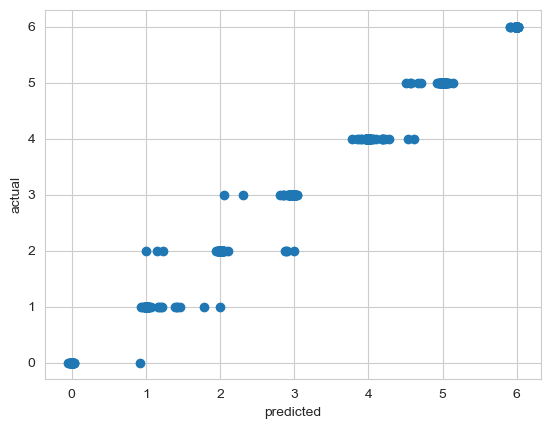

In [55]:
# plot the performance of the winning model on the test set.
plt.scatter(fitted_models['gbm'].predict(X_test), y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [56]:
# save the wining model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gbm'].best_estimator_, f)

## 7 Insights & Analysis

Summarize the results, discuss most important findings, and even explain how I would expand upon your project if you had more time and resources.
* What are the key findings and results?
* What is the winning model (if applicable)?
* What did I personally learn by completing this project?
* How would I expand upon or improve this project if I had more time and/or resources?
* Are there any additional datasets that I would wish to acquire?
* Were there any useful references that helped I complete your project?

In [59]:
with open('final_model.pkl', 'rb') as f:
    model=pickle.load(f)

In [60]:
type(model)

sklearn.pipeline.Pipeline

In [61]:
# extract the final estimator from the pipeline 
final_model = model.named_steps['gradientboostingregressor'] 

In [62]:
# Feature Importance
feature_importance = final_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [116]:
# drop BMI and gender, age features
feature_importance_df2=feature_importance_df.drop([11, 0, 1],axis=0)

Text(0.5, 1.0, 'Feature Importance from Gradient Boosting')

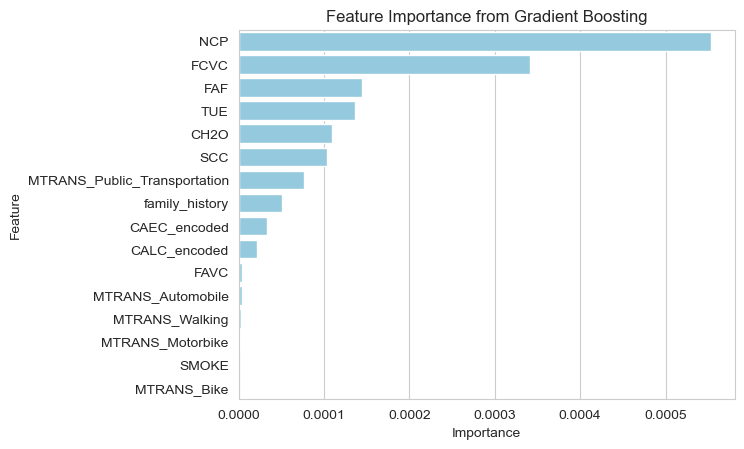

In [120]:
sns.barplot(data=feature_importance_df2, x='Importance', y='Feature', color='skyblue')
plt.title('Feature Importance from Gradient Boosting')

### These lifestyle and eating habits are higly relate the obesity levels

* NCP : How many main meals do you have daily?* 
FCVC : Do you usually eat vegetables in your meals
* FAF: How often do you have physical activity?
* CH2O : How much water do you drink daily?ls?

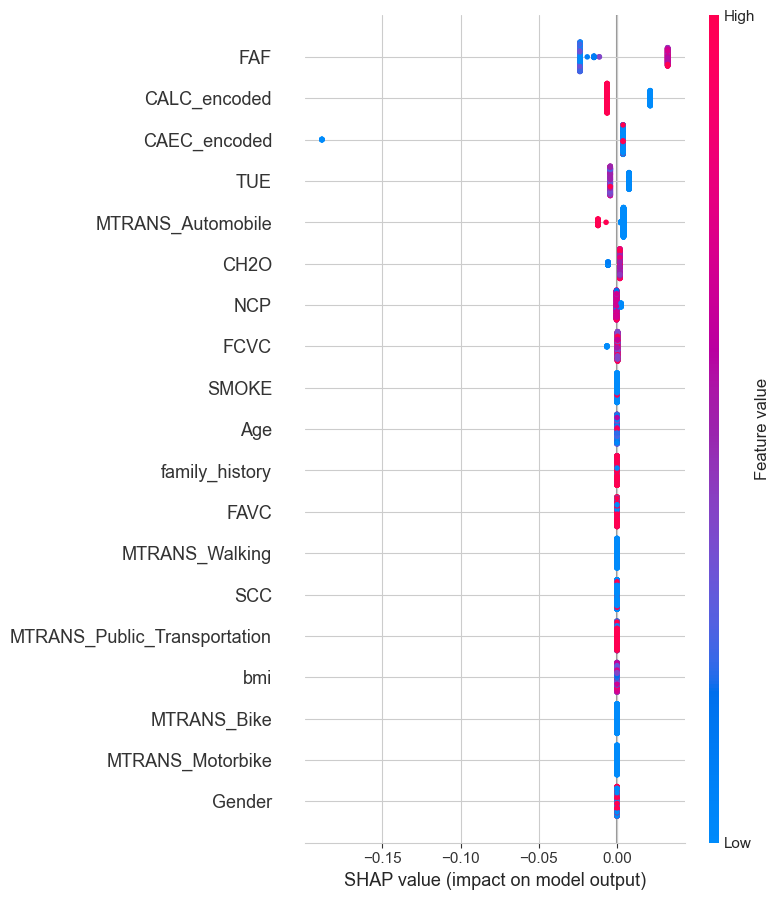

In [122]:
# SHAP Values
import shap

explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)

### Interpretation of Key Features
* FAF (Frequent Physical Activity), Encoded categorical variables (e.g., CAEC_encoded, CALC_encoded), and TUE (Technology Use Experience) have the largest impact, as their SHAP values show a wider spread. High values (red) mostly increase predictions, while low values (blue) decrease them.
* NCP (Number of Meals per Day) and CH2O (Water Consumption) show smaller influence but still contribute.
* Features near the bottom (e.g., Gender, MTRANS_Bike, MTRANS_Motorbike) have almost no impact, as their SHAP values are close to zero.
### Key Takeaways
* The most influential features are FAF and TUE, meaning physical activity and technology use have a strong correlation with the target variable.
* Lifestyle-related features (exercise, diet, and habits like smoking) are important in driving model predictions.
* Some features are less relevant, meaning they may not contribute much to improving the model’s predictive performance.